In [16]:
%load_ext autoreload
%autoreload 2
import sys
import torch
from torch import nn
sys.path.append('..')
# sys.path.append('/system/user/beck/pwbeck/projects/regularization/ml_utilities')
from pathlib import Path
from typing import Union
from dataclasses import dataclass
from ml_utilities.torch_models.base_model import BaseModel
from ml_utilities.torch_models.fc import FC
from ml_utilities.torch_models import get_model_class
from ml_utilities.utils import save_dict_as_json, save_dict_as_yml
from omegaconf import OmegaConf

from erank.utils import load_directions_matrix_from_task_sweep
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
gpu_id = 0

/home/max/anaconda3/envs/erank/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
s = 'arange(0,10,2)'

In [3]:
'arange' in s

True

In [14]:
args = s.replace('arange', '').replace('(','').replace(')','').split(',')
args

['0', '10', '2']

In [23]:
assert 0 < len(args) <=3

In [24]:
np.arange(*[float(arg) for arg in args]).tolist()

[0.0, 2.0, 4.0, 6.0, 8.0]

In [7]:
s.find('arange')

0

## save dict

In [8]:
d = {'best_epoch': 10, 'best_val_score': 0.06666545569896698}
df = pd.Series(d)
# df.to_csv('./file.csv')

In [16]:
# save_dict_as_json('.', 'file', d)
# save_dict_as_yml('.', 'file', d)

In [1]:
# pd.read_json('./file.json')

## Eigenvalues of random matrices

In [21]:
# m = np.random.default_rng().normal(size=(1000,1000))
m = np.random.default_rng().random(size=(1000,1000))
m_eigvals = np.linalg.eigvals(m)

In [22]:
m_eigvals.real.shape

(1000,)

(-34.53696510252115, 525.673699932428, -10.283303419565845, 10.283303419565845)

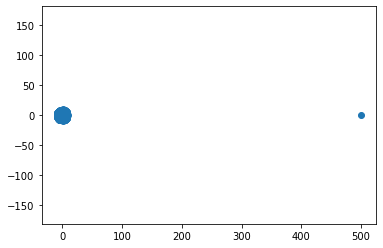

In [23]:
plt.scatter(m_eigvals.real, m_eigvals.imag)
plt.axis('equal')

## 08.09.22

In [4]:
name = 'sinus-7.19.0-erank_var_ds-loss_coeff-10.0-am-[0.1, 2.0]-olr-0.1-ilr-0.001-task_bs-10-inner_iter-30-seed0.yaml'
name.replace('[','').replace(']','').replace(' ','').replace(',','_')

'sinus-7.19.0-erank_var_ds-loss_coeff-10.0-am-0.1_2.0-olr-0.1-ilr-0.001-task_bs-10-inner_iter-30-seed0.yaml'

## 05.09.22

In [32]:
m = torch.randn((6, 112261)).to(device=torch.device('cpu')).requires_grad_()
m

tensor([[-1.7363, -0.8880,  0.0328,  ..., -2.5307,  0.2221, -0.8749],
        [ 0.7856, -0.7975, -0.2946,  ...,  0.1688,  0.0134,  0.6887],
        [-0.7547, -0.9919, -1.1563,  ...,  1.0457,  0.0643,  0.2366],
        [-0.0737, -0.4801, -1.8701,  ...,  0.2879, -0.0354, -1.0340],
        [-0.9627, -1.8982, -1.1916,  ...,  1.0044,  0.6587,  1.4006],
        [ 1.0660,  0.4745, -0.4827,  ...,  0.1352, -1.6137, -0.9944]],
       requires_grad=True)

In [3]:
torch.linalg.svd(m, full_matrices=False)

torch.return_types.linalg_svd(
U=tensor([[ 0.1755, -0.0308,  0.8285,  0.5199, -0.0112, -0.1069],
        [-0.2985,  0.4408,  0.3672, -0.3339, -0.2642,  0.6329],
        [ 0.7794,  0.2417, -0.0480, -0.0882,  0.4381,  0.3634],
        [-0.0304,  0.3378, -0.4191,  0.7502, -0.2600,  0.2808],
        [-0.2449, -0.6613, -0.0068,  0.1833,  0.3469,  0.5905],
        [-0.4601,  0.4415,  0.0279,  0.1184,  0.7417, -0.1686]],
       device='cuda:0', grad_fn=<SvdHelperBackward0>),
S=tensor([336.1585, 335.6111, 334.9757, 334.4580, 334.0035, 332.8638],
       device='cuda:0', grad_fn=<SvdHelperBackward0>),
Vh=tensor([[ 0.0029, -0.0019,  0.0012,  ..., -0.0002,  0.0099,  0.0016],
        [-0.0004, -0.0007,  0.0010,  ...,  0.0012,  0.0045,  0.0023],
        [ 0.0068,  0.0042, -0.0087,  ..., -0.0015, -0.0020, -0.0010],
        [ 0.0023,  0.0023,  0.0010,  ..., -0.0028, -0.0019, -0.0015],
        [-0.0006, -0.0027,  0.0013,  ...,  0.0008, -0.0003,  0.0014],
        [-0.0015,  0.0028, -0.0048,  ..., -0.000

In [4]:
0 or 10

10

In [5]:
x = set()

In [6]:
x.add(1)
x

{1}

In [7]:
x.add((1,2))
x.add((2,1))
x

{(1, 2), (2, 1), 1}

In [8]:
rng = np.random.default_rng()
ar = np.arange(4)

In [9]:
for i in range(10):
    print(rng.choice(ar,3, replace=False, shuffle=False))

[0 2 3]
[1 2 3]
[0 2 3]
[1 0 3]
[0 2 3]
[0 1 2]
[1 2 3]
[0 2 1]
[0 1 3]
[1 2 3]


In [10]:
class X(object):

    __name__ = 'X1'

In [11]:
x = X()
__name__

'__main__'

In [12]:
bar = np.array([1,2,4,5])
aar = np.array([])
np.setdiff1d(bar, aar, assume_unique=True)

array([1, 2, 4, 5])

## 31.08.22

In [13]:
bool({'x':0})
Path.cwd().is_absolute()

True

## 11.8.22

In [14]:
num = 15
num_format = '3'
s = f'name_{num:0{num_format}}'
s
1e6

1000000.0

## 04.08.22

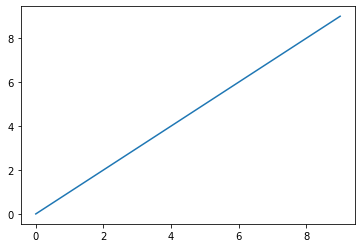

In [15]:
fig, ax = plt.subplots(1,1)
ax.plot(np.arange(10))

In [16]:
# fig.savefig('x.png')

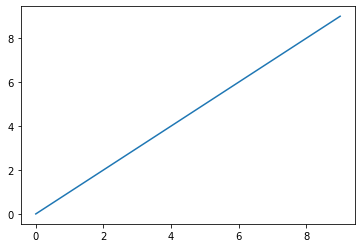

In [17]:
fig

## 29.07.22

In [18]:
max([1,34,5])

34

In [19]:
bool({'k':3})

True

In [20]:
plt.close(None)

In [21]:
a = 4.1231123413
f'{a:2.4f}'

'4.1231'

In [22]:
x = list([3,4])
x

[3, 4]

In [23]:
conf = """
t: (4,5)
l: [2,3]
"""
cfg = OmegaConf.create(conf)
cfg

{'t': '(4,5)', 'l': [2, 3]}

In [24]:
torch.linspace(-5,5,50).requires_grad

False

In [25]:
a = b = 5
a, b

(5, 5)

In [26]:
# test parameter.grad after initialization and what happens when we call optimizer.zero_grad()
x = torch.tensor([5.])
p = torch.nn.Parameter(x)
p.requires_grad, x.requires_grad, p.grad

(True, False, None)

In [27]:
adam = torch.optim.Adam([p])
adam.zero_grad()
p.grad

In [28]:
x.unsqueeze(0).shape
x = torch.tensor([2.,4.])
x.tolist()

[2.0, 4.0]

In [29]:
p.grad = torch.tensor(3.)
p.grad

RuntimeError: assigned grad has data of a different size

In [ ]:
import torchmetrics
mc = torchmetrics.MetricCollection([])
mc(5,4), mc.compute()

({}, {})

## 27.07.22

In [ ]:
l = [0,12,1,3]
l = 4

In [ ]:
from typing import Iterable
if not isinstance(l, Iterable):
    l = [l]
s = ''
for it in l:
    s += str(it) if s == '' else f'_{str(it)}'
s

'4'

## 25.07.22

In [ ]:
import socket
print(socket.gethostname())

bool(True and {'x': 5})

max-ThinkPad-P1


True

In [ ]:
x = [1,4,65]
x.pop(1)
x.remove()

TypeError: remove() takes exactly one argument (0 given)

## older

In [ ]:
d = {}

In [ ]:
d2 = {**d}

In [ ]:
d2

{}

In [ ]:
@dataclass
class data:
    x: int

In [ ]:
da = data(5)

In [ ]:
model = FC.load('/system/user/beck/pwbeck/projects/regularization/erank/outputs/f_mnist_DEBUG_240622_082301/model_epoch_000.p', device=gpu_id)

In [ ]:
model_vec = nn.utils.parameters_to_vector(model.parameters())

In [ ]:
torch.linalg.norm(model_vec, ord=2, keepdim=True).item()

18.578397750854492

In [ ]:
from collections import deque

In [ ]:
q = deque(maxlen=2)

In [ ]:
q.append(5)
q.append(7)
q.append(10)
q

deque([7, 10])

In [ ]:
torch.tensor(q)

tensor([ 7, 10])

In [ ]:
len(q)

2

In [ ]:
q[-1] - q[-2]

3

In [ ]:
q[-1], q[-2]

(10, 7)

In [ ]:
import torchmetrics
from torchmetrics import MetricCollection

In [ ]:
metrics = MetricCollection([torchmetrics.Accuracy()])#, torchmetrics.F1Score()])

In [ ]:
metrics['Accuracy']

Accuracy()

In [ ]:
for m, c in metrics.items():
    print(m, c)

Accuracy Accuracy()


In [ ]:
metrics[list(metrics.keys())[0]].higher_is_better

True

In [ ]:
t = torch.tensor([1])

In [ ]:
metrics(t, t)

{'Accuracy': tensor(1.)}

In [ ]:
metrics.compute()

{'Accuracy': tensor(1.)}